# Previous Lessons

## Dataframes and String Outputs

**Objective**
- Display dataframes on Streamlit
- Add Streamlit's caching to a function
- Display string outputs using StringIO()

### Working with Streamlit before adding to .py file

In [14]:
# Imports
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

Load data. Keep demo simple and only include target and some features.

In [17]:
# Load data 
fpath =  "Data/ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df = df.set_index("PID")
# Define columns to use
columns_to_use = columns_to_use = ['SalePrice', 'Living Area Sqft', 'Lot Frontage', 'Bldg Type', 'Bedroom','Total Full Baths','MS Zoning','Street', 'Alley','Utilities']
df = df[columns_to_use]
df.head()

,SalePrice,Living Area Sqft,Lot Frontage,Bldg Type,Bedroom,Total Full Baths,MS Zoning,Street,Alley,Utilities
PID,,,,,,,,,,
907227090,119900.0,864.0,60.0,1Fam,3,1.0,RL,Pave,NaN,AllPub
527108010,320000.0,2462.0,134.0,1Fam,4,3.0,RL,Pave,NaN,AllPub
534275170,151500.0,958.0,NaN,1Fam,2,1.0,RL,Pave,NaN,AllPub
528104050,385000.0,2084.0,114.0,1Fam,2,3.0,RL,Pave,NaN,AllPub
533206070,193800.0,1565.0,32.0,TwnhsE,2,3.0,FV,Pave,Pave,AllPub


Now functionalize the code to ultimately display an interactive dataframe in the app.

### Displaying a DataFrame

For performance purposes, we will want to wrap commands that produce data or load models as functions. This will allow us to take advantage of Streamlits caching, which will store objects in memory and avoid re-running unnecessary steps in your code.

To take advantage of Streamlit's caching, we add use the decorator function @st.cache_data. Decorator functions are functions that are designed to work on other functions. To use a decorator, we use the @ symbol and the function name on the line immediately before the main function's def line

In [4]:
# Select columns to use
columns_to_use = ['SalePrice', 'Living Area Sqft', 'Lot Frontage', 'Bldg Type', 'Bedroom',
                      'Total Full Baths','MS Zoning','Street', 
                      'Alley','Utilities']
# Functionizing the load data from above for .py file
def load_data():
    fpath =  "Data/ames-housing-dojo-for-ml.csv"
    df = pd.read_csv(fpath)
    df = df.set_index("PID")
    df = df[columns_to_use]
    return df

In [5]:
# Verify the function works as expected before adding to notebook
df = load_data()
df.head()

,SalePrice,Living Area Sqft,Lot Frontage,Bldg Type,Bedroom,Total Full Baths,MS Zoning,Street,Alley,Utilities
PID,,,,,,,,,,
907227090,119900.0,864.0,60.0,1Fam,3,1.0,RL,Pave,NaN,AllPub
527108010,320000.0,2462.0,134.0,1Fam,4,3.0,RL,Pave,NaN,AllPub
534275170,151500.0,958.0,NaN,1Fam,2,1.0,RL,Pave,NaN,AllPub
528104050,385000.0,2084.0,114.0,1Fam,2,3.0,RL,Pave,NaN,AllPub
533206070,193800.0,1565.0,32.0,TwnhsE,2,3.0,FV,Pave,Pave,AllPub


In [6]:
# Obtain summary statistics
df.describe().round(2)

,SalePrice,Living Area Sqft,Lot Frontage,Bedroom,Total Full Baths
count,2930.00,2930.00,2440.00,2930.00,2928.00
mean,180825.07,1499.69,69.22,2.85,2.00
std,79878.22,505.51,23.37,0.83,0.75
min,12789.00,334.00,21.00,0.00,0.00
25%,129500.00,1126.00,58.00,2.00,1.00
50%,160000.00,1442.00,68.00,3.00,2.00
75%,213500.00,1742.75,80.00,3.00,2.00
max,755000.00,5642.00,313.00,8.00,6.00


In [7]:
# In our notebook we can use df.info() to output our summary info into our console (direclty below the cell)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SalePrice         2930 non-null   float64
 1   Living Area Sqft  2930 non-null   float64
 2   Lot Frontage      2440 non-null   float64
 3   Bldg Type         2930 non-null   object 
 4   Bedroom           2930 non-null   int64  
 5   Total Full Baths  2928 non-null   float64
 6   MS Zoning         2930 non-null   object 
 7   Street            2930 non-null   object 
 8   Alley             198 non-null    object 
 9   Utilities         2930 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 251.8+ KB


While DataFrame.info() is a method that prints information to the console, Streamlit requires a slightly different approach since we want to display this information in the app. We can capture the info() output with an IO buffer and then display it.

In [8]:
# Display .info()
# In order to display output on our app, we first need to capture it. 
# We can use an IO buffer to capture the output, then we will use the getvalue() argument to retrive it
from io import StringIO
# Create a string buffer to capture the content
buffer = StringIO()
# Write the info into the buffer
df.info(buf=buffer)
# Retrieve the content from the buffer
summary_info = buffer.getvalue()

If we try to display the variable, we will see that it is a string. The output in the Jupyter console does not render the formatting.

In [9]:
# What the output looks like in the console
summary_info

"<class 'pandas.core.frame.DataFrame'>\nInt64Index: 2930 entries, 907227090 to 902201120\nData columns (total 10 columns):\n #   Column            Non-Null Count  Dtype  \n---  ------            --------------  -----  \n 0   SalePrice         2930 non-null   float64\n 1   Living Area Sqft  2930 non-null   float64\n 2   Lot Frontage      2440 non-null   float64\n 3   Bldg Type         2930 non-null   object \n 4   Bedroom           2930 non-null   int64  \n 5   Total Full Baths  2928 non-null   float64\n 6   MS Zoning         2930 non-null   object \n 7   Street            2930 non-null   object \n 8   Alley             198 non-null    object \n 9   Utilities         2930 non-null   object \ndtypes: float64(4), int64(1), object(5)\nmemory usage: 251.8+ KB\n"

It will render as expected when we use st.text() to display it on our app.

### Displaying Null Value Output (.isna().sum())

In [11]:
# First check results in notebook
# Displaying null values
nulls =df.isna().sum()
nulls

SalePrice              0
Living Area Sqft       0
Lot Frontage         490
Bldg Type              0
Bedroom                0
Total Full Baths       2
MS Zoning              0
Street                 0
Alley               2732
Utilities              0
dtype: int64

In [12]:
# Check data type
type(nulls)

pandas.core.series.Series

We have a few options for how we choose to display a series.

Option 1: Display as a dataframe using st.dataframe()

Option 2: Display as a string using the io buffer

We demonstrate both options in the code below.

In [15]:
# We could display the output series as a dataframe
st.markdown("#### Null Values as dataframe")
nulls =df.isna().sum()
st.dataframe(nulls)
# Create a string buffer to capture the content
buffer = StringIO()
# Write the content into the buffer...use to_string
df.isna().sum().to_string(buffer)
# Retrieve the content from the buffer
null_values = buffer.getvalue()
# Use Streamlit to display the info
st.markdown("#### Null Values as String")
st.text(null_values)

2024-02-17 14:50:20.446 
  command:

    streamlit run C:\Users\Malue\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

### Summary

In this lesson, you learned how to functionalize the loading of your data and how to add a caching decorator to the function to improve your app's performance. Streamlit's dataframe widget is interactive. You also learned how to capture and display output using an IO buffer. In the next lesson, we will display plots and add interactivity to our EDA app.

# Displaying Plots

**Objective**
- Display plots on Streamlit app
- Use custom EDA Functions on Streamlit app
- Add interactivity to plots

### Displaying a Histogram

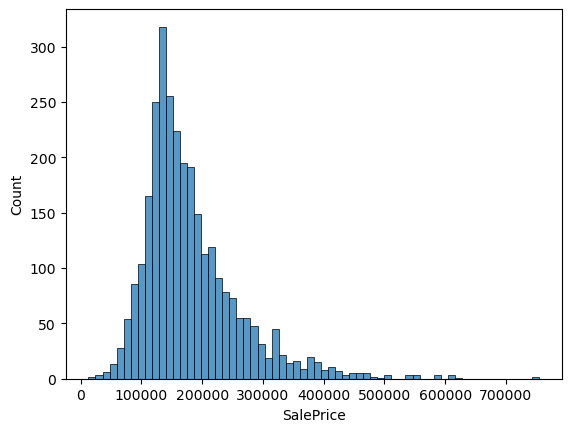

In [18]:
# Histogram
sns.histplot(data = df, x = 'SalePrice');

In [19]:
# Function for returning a histogram fig
def plot_hist(df, column):
    fig, ax = plt.subplots()
    sns.histplot(data = df, x = column)
    return fig

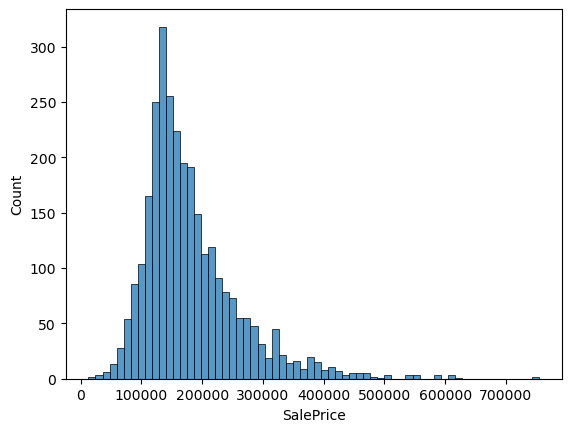

In [20]:
# Test the function
fig = plot_hist(df, 'SalePrice')

**Displaying plots from Custom EDA Functions**

Now that we can display plots, we can leverage the custom functions we created previously in this program. We will revisit two functions that we created in Course 1, week 4. The functions produced customized eda plots for categorical or numerical features. Our ultimate goal will be to allow users to select any feature from a dropdown menu and display the appropriate eda plots.


#### explore_categorical

In [21]:
# Revisiting original custom function for exploring categorical values
# Original from LP week 4
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
 
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

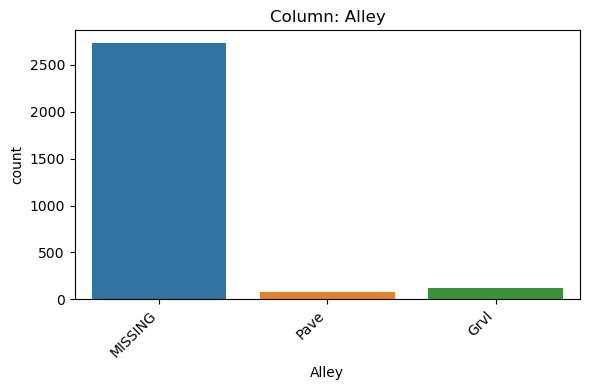

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [22]:
# Review function output
explore_categorical(df, 'Alley');

Note that we will only display the plots and will not display the print statements in this demo.

As written, this function returns the fig and ax. When we define the outputs of the function, we must define two variables (one for the fig, and one for the ax).

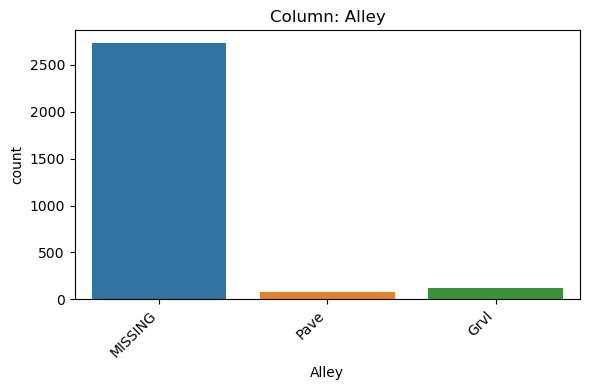

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [24]:
# Save the output of the function
fig, ax = explore_categorical(df, 'Alley')

#### explore_numeric

In [25]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  return fig

Let's review the output of this function using LotFrontage as our numerical feature.

Note that this function only returns a single object, so we can just define the "fig" when we call the function.

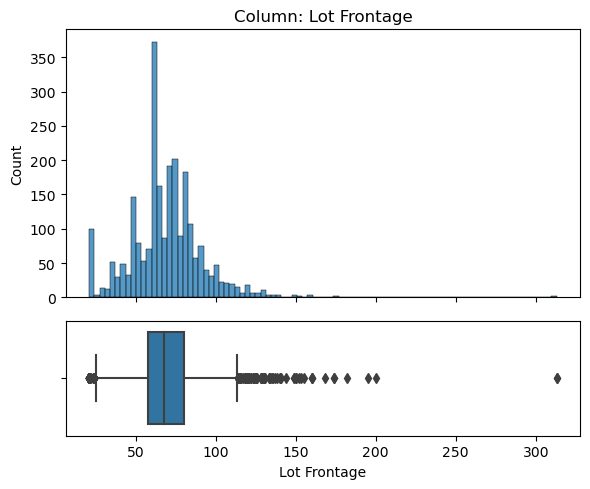

- NaN's Found: 490 (16.72%)


In [26]:
# Review output
fig = explore_numeric(df, 'Lot Frontage')

#### Interactive feature choice

Now that we can display the outputs for categorical features and for numerical features, we are going to modify the app to allow users to select any feature from a dropdown menu and produce the appropriate plot.

We will use a conditional statement to ensure the correct function is used based on the datatype of the feature. If the feature is an object, we will produce the plots using the explore_categorical function. Otherwise, we will produce the numeric plots.

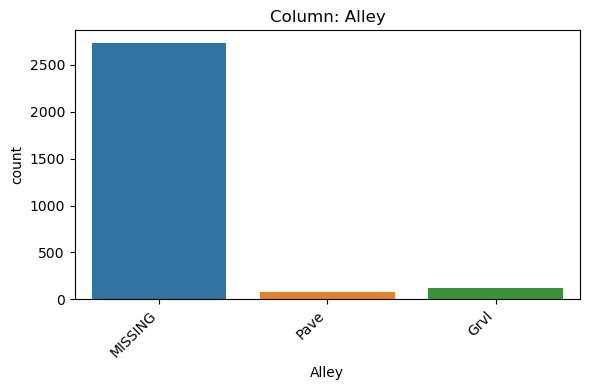

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [27]:
# Try a categorical column to test conditional statement
column = 'Alley'
if df[column].dtype == 'object':
    fig = explore_categorical(df, column)
else:
    fig = explore_numeric(df, column)

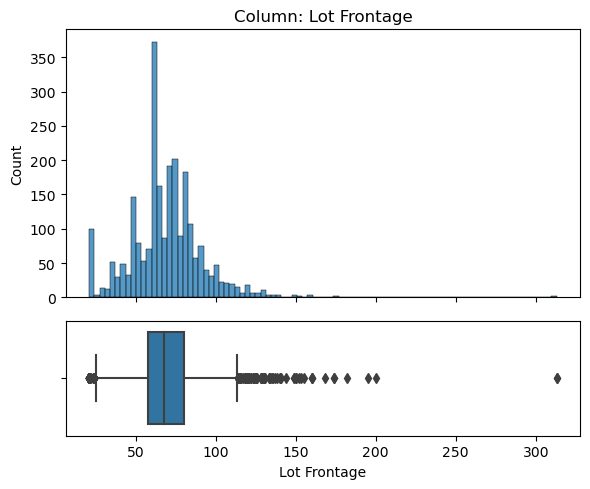

- NaN's Found: 490 (16.72%)


In [28]:
# Try a numeric column to test conditional statement
column = 'Lot Frontage'
if df[column].dtype == 'object':
    fig = explore_categorical(df, column)
else:
    fig = explore_numeric(df, column)

Instead of defining a particular column, we will use st.selectbox() to give users a choice.

Recall that we have already defined a list of all the columns.

In [29]:
# Check list of columns
columns_to_use

['SalePrice',
 'Living Area Sqft',
 'Lot Frontage',
 'Bldg Type',
 'Bedroom',
 'Total Full Baths',
 'MS Zoning',
 'Street',
 'Alley',
 'Utilities']

We will use this list within the st.selectbox() function.

Add the following code to your .py file.

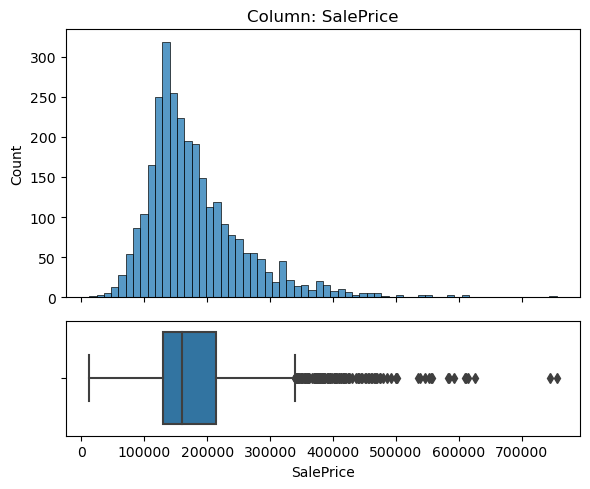

- NaN's Found: 0 (0.0%)


DeltaGenerator()

In [30]:
# Add a selectbox for all possible features
column = st.selectbox(label="Select a column", options=columns_to_use)
# Conditional statement to determine which function to use
if df[column].dtype == 'object':
    fig, ax  = explore_categorical(df, column)
else:
    fig = explore_numeric(df, column)
    
st.markdown("#### Displaying appropriate plot based on selected column")
# Display appropriate eda plots
st.pyplot(fig)

Take some time to change the selected column from the dropdown menu and notice how the plots change to match your selection!

This app is all about learning and exploring, but if you wanted to deploy it, you would remove the code to display the plots we used to build up to this point. You would also use headers appropriate for the end user.

### Summary

In this lesson, you learned how to display plots, take advantage of existing plotting functions, and add interactivity to your app. App building is an iterative process! The practice assignment will allow you to display more plots using some of the other custom eda functions from earlier in the program.